In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#données Voiture
np.random.seed(42)
n = 500
prix = np.random.normal(20000, 5000, n)  # Prix des voitures
kilometrage = np.random.normal(100000, 20000, n)  # Kilométrage des voitures

# Ajouter la colonne Puissance avec une relation linéaire au prix
# Puissance (en chevaux) est proportionnelle au prix avec un bruit aléatoire
puissance = 0.015 * prix + np.random.normal(10, 3, n)  # Relation linéaire

# Ajouter des valeurs manquantes dans la colonne Puissance (MCAR)
missing_indices = np.random.choice(range(n), size=int(0.05 * n), replace=False)
puissance[missing_indices] = np.nan

# Créer le DataFrame
data = pd.DataFrame({
    "Prix": prix,
    "Kilometrage": kilometrage,
    "Puissance": puissance
})

# Vérifier les données
data.head()



,Prix,Kilometrage,Puissance
0,22483.570765,118523.550951,351.451628
1,19308.678494,138188.332809,302.404078
2,23238.442691,72028.648524,358.755531
3,27615.149282,111259.384734,422.286429
4,18829.233126,86987.148618,294.533167


In [2]:
data.shape

(500, 3)

In [3]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes :")
print(data.isnull().sum())


Valeurs manquantes :
Prix            0
Kilometrage     0
Puissance      25
dtype: int64


<Axes: xlabel='Prix', ylabel='Puissance'>

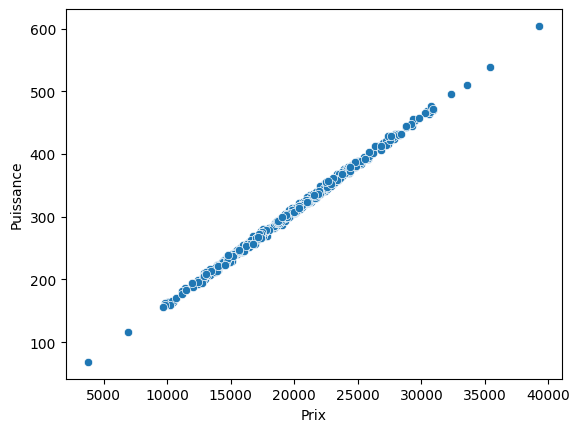

In [4]:
sns.scatterplot(data, x=data.Prix, y=data.Puissance)

In [5]:
# --- Imputation des valeurs manquantes ---
# Imputation par régression linéaire
# Utiliser Prix pour imputer les valeurs manquantes de Puissance
known_data = data.dropna()  # Données complètes
missing_data = data[data["Puissance"].isnull()]  # Données avec Puissance manquante

# Modèle de régression linéaire
lr = LinearRegression()
lr.fit(known_data[["Prix"]], known_data["Puissance"])

# Prédire les valeurs manquantes
predicted_puissance = lr.predict(missing_data[["Prix"]])
data.loc[data["Puissance"].isnull(), "Puissance"] = predicted_puissance

# Vérifier après imputation
print("Valeurs manquantes après imputation :")
print(data.isnull().sum())


Valeurs manquantes après imputation :
Prix           0
Kilometrage    0
Puissance      0
dtype: int64


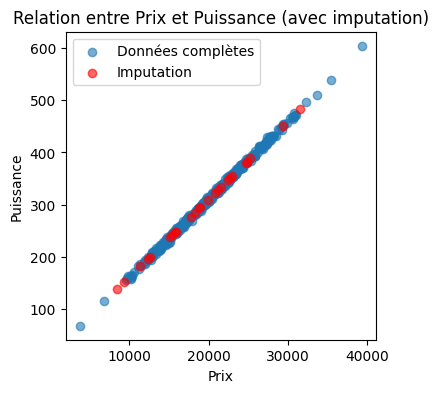

In [6]:
# --- Visualisation ---
# Distribution de la puissance avant et après imputation
plt.figure(figsize=(4, 4))
plt.scatter(known_data["Prix"], known_data["Puissance"], label="Données complètes", alpha=0.6)
plt.scatter(missing_data["Prix"], predicted_puissance, label="Imputation", alpha=0.6, color="red")
plt.xlabel("Prix")
plt.ylabel("Puissance")
plt.title("Relation entre Prix et Puissance (avec imputation)")
plt.legend()
plt.show()